In [20]:
from sklearn.model_selection import ParameterGrid 
param_grid = {'a':[1,2],'b':[True,False]} 
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [21]:
param_grid = [{'kernel':['linear']},{'kernel':['rbf'],'gamma':[1,10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

In [22]:
# 선형회귀 => 비선형회귀

In [23]:
from sklearn.preprocessing import PolynomialFeatures # 데이터를 다차원으로 변환
from sklearn.linear_model import LinearRegression # 선형회귀 => 비선형회귀

# train / validation / test 
# 전처리를 어느 시점에서 해야 하는가
# 전처리후 나누는가
# 나누고 전처리를 하는가 : 순서적으로 적용 ===> pipe_line
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2 , **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs)) # 비선형회귀를 위해 다차원으로 보내고 비선형회귀 하도록 pipeline 으로 묶음

In [24]:
import numpy as np
def make_data(N , err = 1.0 , rseed = 1): # 학습을 위한 데이터
    rng = np.random.RandomState(rseed) # 의사난수의 시작점을 지정 ( 실제 난수처럼 보이도록 함 )
    X = rng.rand(N,1) ** 2
    y = 10 - 1/ (X.ravel() + 0.1) # ravel() : 데이터를 1차원으로 배열
    if err > 0:
        y += err * rng.randn(N)
    return X,y
X,y = make_data(40)
print(type(X))

<class 'numpy.ndarray'>


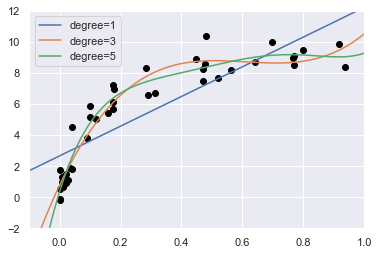

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
X_test = np.linspace(-0.1,1.1,500)[:,None] # -0.1 ~ 1.1 까지 지정하고 500개로 나눔 

plt.scatter(X.ravel(),y,color='black') # 점 출력
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test) # 학습데이터로 바로 예측
    plt.plot(X_test.ravel(),y_test,label = 'degree={}'.format(degree))
plt.xlim(-0.1,1)
plt.ylim(-2,12)
plt.legend(loc='best')

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree':np.arange(21),
               'linearregression__fit_intercept' : [True,False],
               'linearregression__normalize':[True,False] }
grid = GridSearchCV(PolynomialRegression() , param_grid , cv = 7)
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [27]:
grid.best_params_ # 최적의 parameter 를 알려줌

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [28]:
grid.get_params() # parameter를 보여줌

{'cv': 7,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('polynomialfeatures', PolynomialFeatures()),
  ('linearregression', LinearRegression())],
 'estimator__verbose': False,
 'estimator__polynomialfeatures': PolynomialFeatures(),
 'estimator__linearregression': LinearRegression(),
 'estimator__polynomialfeatures__degree': 2,
 'estimator__polynomialfeatures__include_bias': True,
 'estimator__polynomialfeatures__interaction_only': False,
 'estimator__polynomialfeatures__order': 'C',
 'estimator__linearregression__copy_X': True,
 'estimator__linearregression__fit_intercept': True,
 'estimator__linearregression__n_jobs': None,
 'estimator__linearregression__normalize': False,
 'estimator__linearregression__positive': False,
 'estimator': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 'n_jobs': None,
 'param_grid': {'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,

In [29]:
grid.cv_results_['params'] # degree 차수에 따라 진행된 결과를 보여줌

[{'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 0},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 1},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 2},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 3},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 4},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 5},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 6},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 7},
 {'linearregression__fit_intercept': True,
  'linearregr

In [30]:
grid.best_estimator_ # 최고의 조합일때

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

In [31]:
grid.best_score_ # 최고의 조합일때의 정확도

0.8972710305736543

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

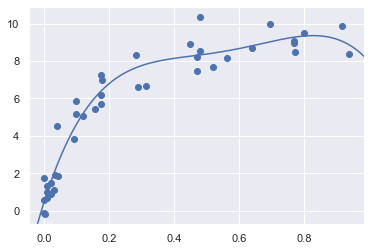

In [32]:
model = grid.best_estimator_ # 최적의 모델

plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

In [33]:
# pip install graphviz  ==> 3d 시각화

In [34]:
# pip install pydot

In [35]:
# pip install pydotplus

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

[Text(334.8, 597.96, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(283.2923076923077, 489.24, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(386.3076923076923, 489.24, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(206.03076923076924, 380.52000000000004, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(103.01538461538462, 271.8, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(309.04615384615386, 271.8, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(257.53846153846155, 163.07999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(360.55384615384617, 163.07999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(309.04615384615386, 54.360000000

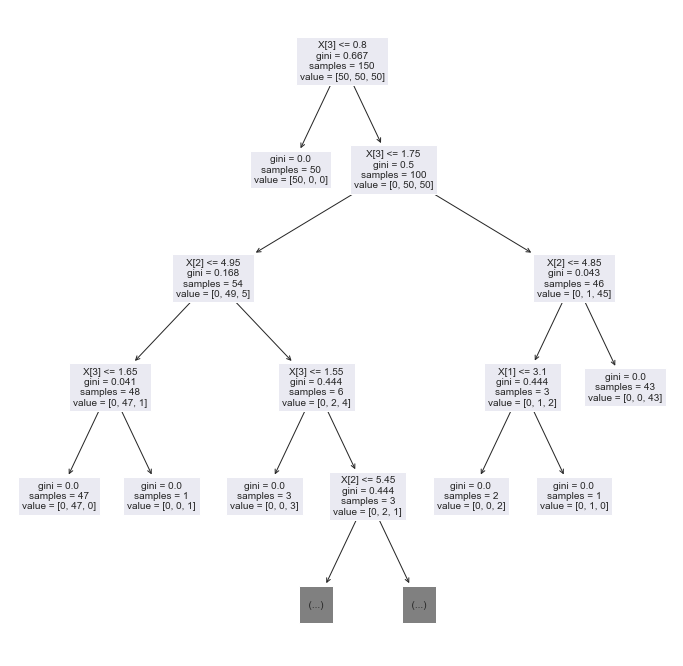

In [37]:
fig ,ax = plt.subplots(figsize=(12,12))
clf = clf.fit(iris.data,iris.target)
tree.plot_tree(clf,max_depth=4,fontsize=10)

In [38]:
cross_val_score(clf,iris.data,iris.target,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [39]:
import pandas as pd
data = pd.DataFrame(iris.data)
print(data.head())
clf.predict(data.iloc[1:150,:])

# 대학 등급 나누기 좋을듯 

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl

def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf,  # dot로 출력
                    feature_names=feature_names)

    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png() # png 이미지로 생성
    return Image(image)

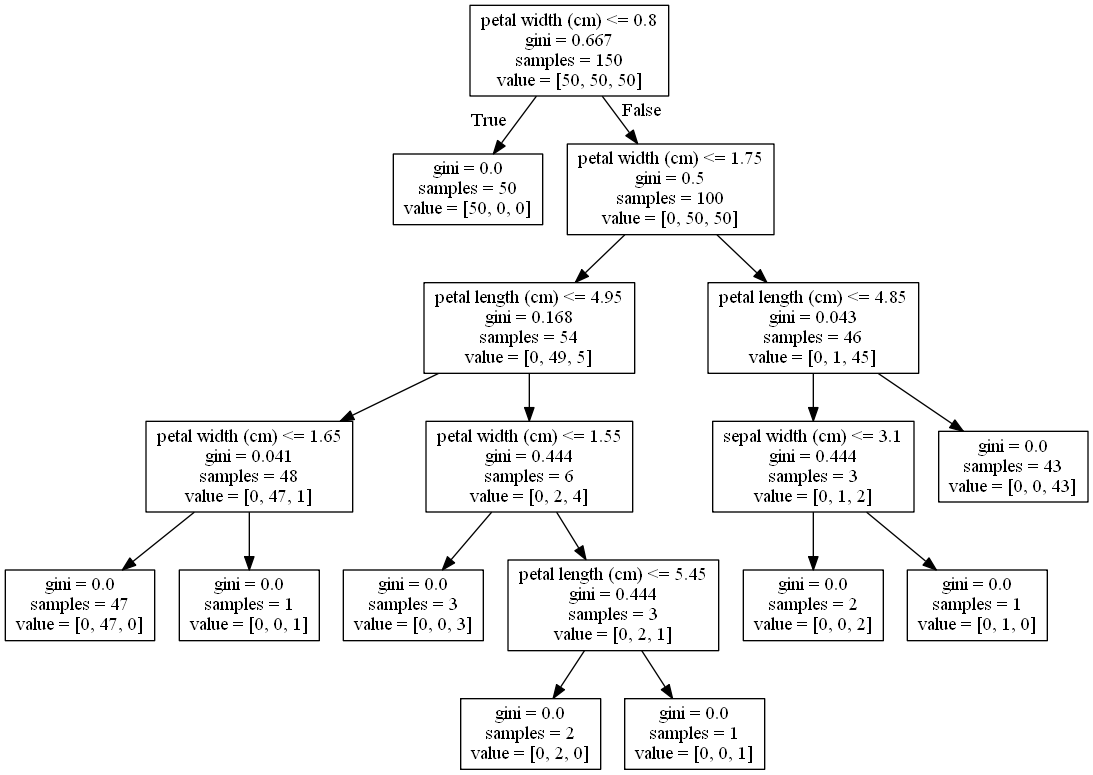

In [72]:
draw_decision_tree(clf, iris.feature_names)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, 
                            n_features=3,
                            n_redundant=0)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

In [42]:
preds = dt.predict(X)
(y == preds).mean()

1.0

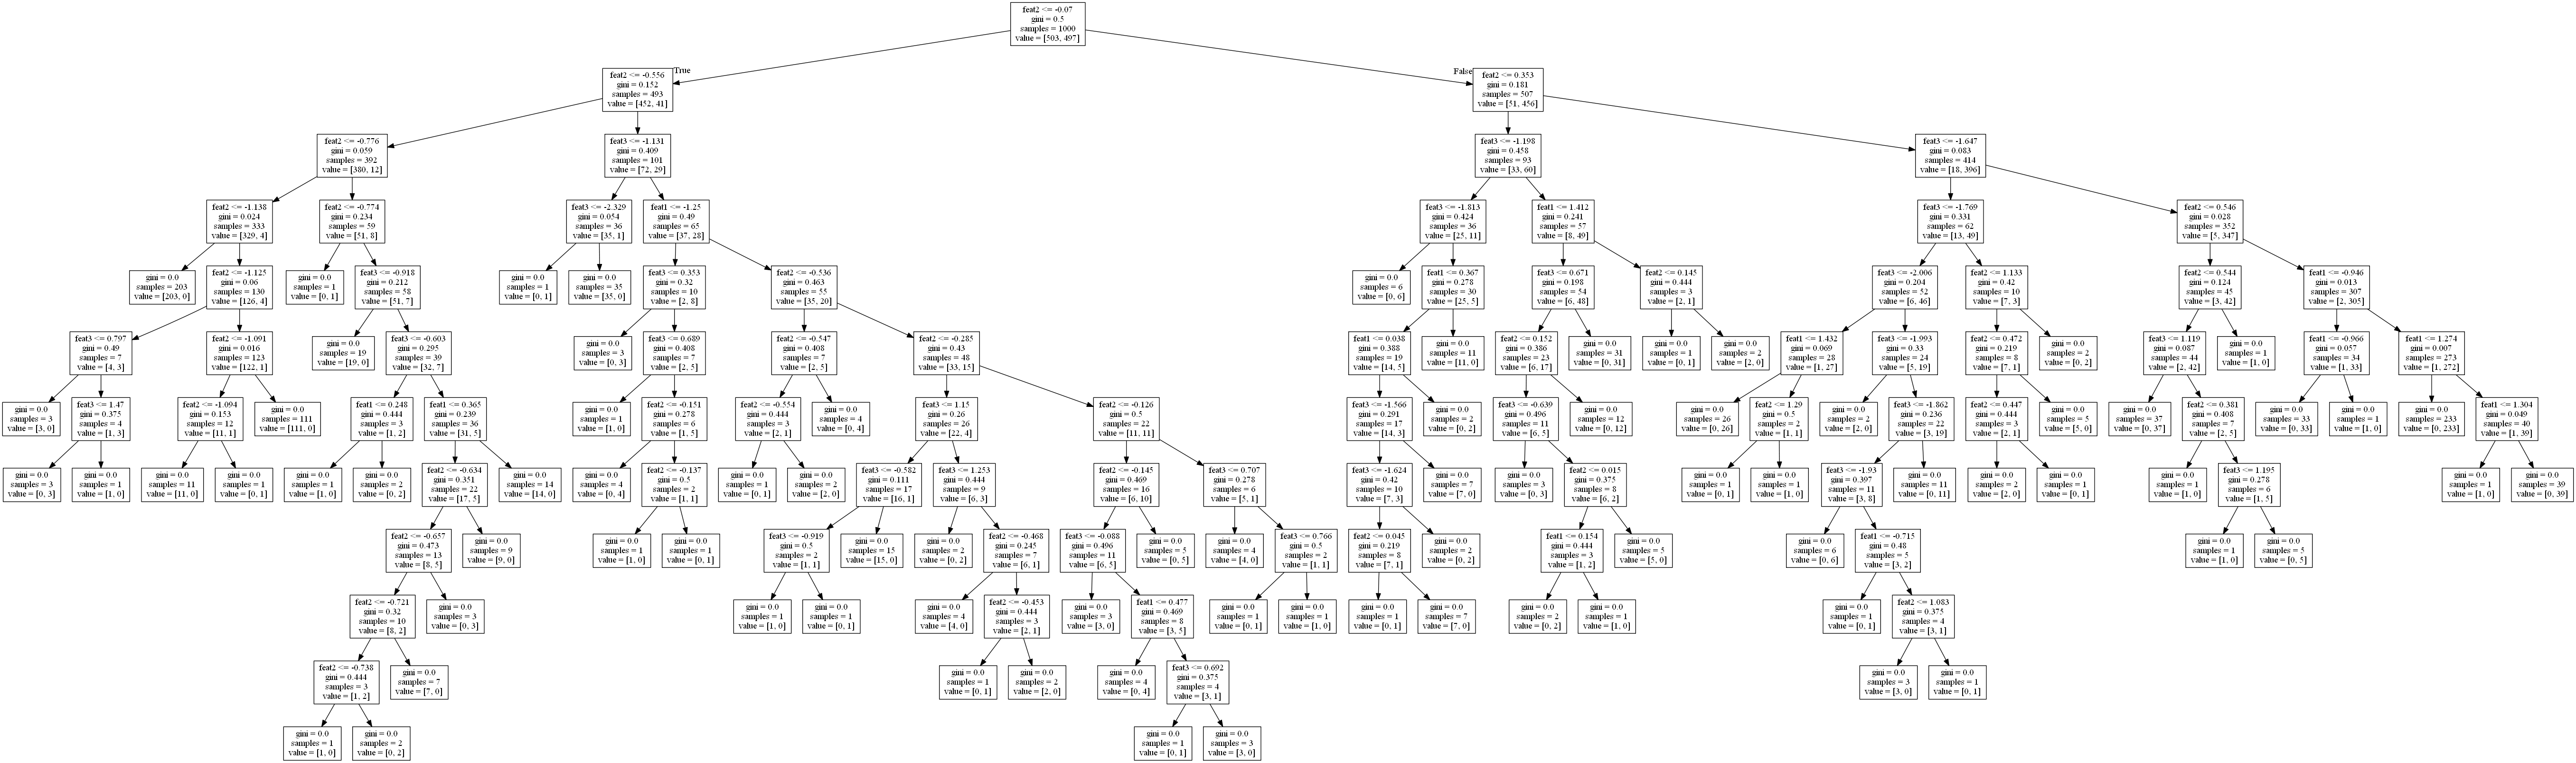

In [76]:
draw_decision_tree(dt,['feat1','feat2','feat3'])

In [77]:
# RF( random forest )
- ensemble
- bagging : bootstrap + aggregation
- voting : 연속성 - 평균 , 범주형 - 다수결의 원리
- stacking : 여러모델의 결과로 다시 모델을 생성 (DT, RF , ADA)
    - n_estimators
    - n_samples
    - max_features

SyntaxError: invalid syntax (<ipython-input-77-a75421ed4525>, line 4)

In [43]:
from  sklearn.datasets import make_classification
X,y = make_classification(1000)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy') # criterion= 의 default 는 gini
rf.fit(X,y)


RandomForestClassifier(criterion='entropy')

In [44]:
print(f"Accuracy : {y == rf.predict(X).mean()}")

Accuracy : [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False Fal

In [45]:
from matplotlib import font_manager , rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family = font_name)

Text(0.5, 1.0, '특성중요도')

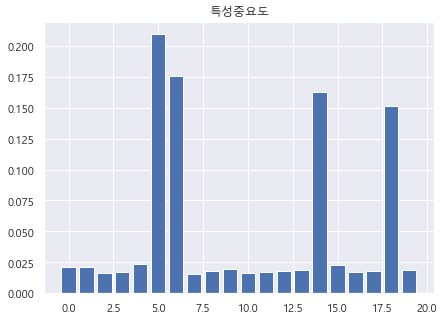

In [46]:
f , ax = plt.subplots(figsize =(7,5))
, ax = plt.subplots(figsize =(7,5))
ax.bar(range(0,len(rf.feature_importances_)), # 변수중요도
    rf.feature_importances_)
ax.set_title('특성중요도')

In [47]:
print(f'종속변수갯수 : {rf.n_classes_}')
print(f'클래스종류 : {rf.classes_}')
print(f'특성수 : {rf.n_features_}')
print(f'모델 : {rf.estimators_}')


종속변수갯수 : 2
클래스종류 : [0 1]
특성수 : 20
모델 : [DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1415681264), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=539157006), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=509430215), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1801464371), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=507566922), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1859821765), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=917734735), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=866427856), DecisionTreeClassifier(criterion='entropy', max_featu

In [48]:
# Tree regression 회귀 : 외삽데이터는 불가하다.abs

In [49]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
boston = load_boston() # 데이터 타입이 Bunch 타입
print(type(boston))

X = boston['data'] # 독립변수
y = boston['target'] # 종속변수
names = boston['feature_names']
rf = RandomForestRegressor() # 매개변수가 없음 => default값으로 설정
rf.fit(X,y)
print('변수중요도 score에 의해 정렬')

<class 'sklearn.utils.Bunch'>
변수중요도 score에 의해 정렬


In [50]:
print(list(zip(map(lambda x : round(x,2),rf.feature_importances_),names)))

# feature_importances 는 입력된 변수 순서와 같다.

[(0.04, 'CRIM'), (0.0, 'ZN'), (0.01, 'INDUS'), (0.0, 'CHAS'), (0.02, 'NOX'), (0.42, 'RM'), (0.01, 'AGE'), (0.07, 'DIS'), (0.0, 'RAD'), (0.01, 'TAX'), (0.02, 'PTRATIO'), (0.01, 'B'), (0.38, 'LSTAT')]


In [51]:
a = list(zip(map(lambda x : round(x,2),rf.feature_importances_),names))
a.sort(reverse=True)
a

[(0.42, 'RM'),
 (0.38, 'LSTAT'),
 (0.07, 'DIS'),
 (0.04, 'CRIM'),
 (0.02, 'PTRATIO'),
 (0.02, 'NOX'),
 (0.01, 'TAX'),
 (0.01, 'INDUS'),
 (0.01, 'B'),
 (0.01, 'AGE'),
 (0.0, 'ZN'),
 (0.0, 'RAD'),
 (0.0, 'CHAS')]

In [52]:
print(sorted(list(zip(map(lambda x : round(x,2),rf.feature_importances_),names)),reverse=True))

[(0.42, 'RM'), (0.38, 'LSTAT'), (0.07, 'DIS'), (0.04, 'CRIM'), (0.02, 'PTRATIO'), (0.02, 'NOX'), (0.01, 'TAX'), (0.01, 'INDUS'), (0.01, 'B'), (0.01, 'AGE'), (0.0, 'ZN'), (0.0, 'RAD'), (0.0, 'CHAS')]


In [53]:
len(names)

13

Text(0.5, 1.0, 'feature importance')

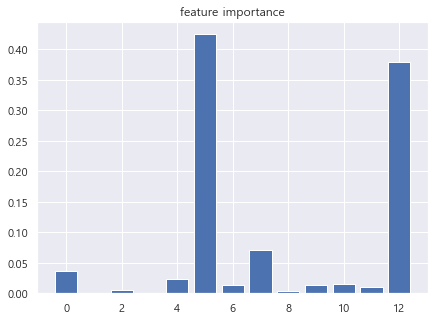

In [54]:
import matplotlib.pyplot as plt
f , ax = plt.subplots(figsize = (7,5))
ax.bar(range(0 , len(rf.feature_importances_)),rf.feature_importances_)
ax.set_title('feature importance')

In [55]:
# 평가 - randomForestRegression (회귀)
- mse , mae , 결정계수

NameError: name 'mse' is not defined

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
pred = rf.predict(X) # 예측데이터
mean_squared_error(y, pred) # 예측데이터와 실제데이터 간의 차이?

1.3782841600790519

In [57]:
mean_absolute_error(y, rf.predict(X))

0.7908913043478256

In [58]:
r2_score(y,rf.predict(X))

0.9836734019599748

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

x_train , x_test , y_train , y_test = train_test_split( cancer.data , cancer.target , random_state= 0)
forest = RandomForestClassifier(n_estimators= 100 , random_state= 0)
forest.fit(x_train , y_train)
print('훈련 세트 정확도 : {:3f}'.format(forest.score(x_train,y_train)))
print('테스트 세트 정확도 : {:3f}'.format(forest.score(x_test,y_test)))

훈련 세트 정확도 : 1.000000
테스트 세트 정확도 : 0.972028


In [60]:
from sklearn.tree import export_graphviz
export_graphviz(forest.estimators_[0], out_file='tree.dot' , class_names=['악성','양성'],feature_names=cancer.feature_names,
                impurity=False , filled=True ,rotate = True)

In [61]:
import graphviz
from IPython.display import display
with open('tree.dot','rt',encoding='utf8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [62]:
# 문제 

- load_breast_cancer 데이터를 사용
- n_estimators = [12,24,36,48,60]
- min_samples_leaf = [1,2,4,8,16]
- 최적의 파라미터를 결정

SyntaxError: invalid syntax (<ipython-input-62-55360c30f997>, line 3)

In [63]:
n_estimators = [12,24,36,48,60]
min_samples_leaf = [1,2,4,8,16]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [64]:
first = 0
for i in n_estimators:
    for j in min_samples_leaf:
        x_train , x_test , y_train , y_test = train_test_split( cancer.data , cancer.target , random_state= 0)
        forest = RandomForestClassifier(n_estimators= i , min_samples_leaf = j, random_state= 0).fit(x_train , y_train)
        result = forest.score(x_train,y_train)
        print(f"n_estimators : {i} 이고 min_samples_leaf  {j} 일때 정확도 : {result}")
        if result > first :
            first = result
            best_i = i
            best_j = j
            model = RandomForestClassifier(n_estimators= best_i , min_samples_leaf = best_j,  random_state= 0).fit(x_train,y_train)
            best_result = model.score(x_train,y_train)

print('----' * 50)
print(f"n_estimators : {best_i} 이고 min_samples_leaf  {best_j} 일때 가장 높은 정확도 : {best_result}")

n_estimators : 12 이고 min_samples_leaf  1 일때 정확도 : 1.0
n_estimators : 12 이고 min_samples_leaf  2 일때 정확도 : 0.9929577464788732
n_estimators : 12 이고 min_samples_leaf  4 일때 정확도 : 0.9835680751173709
n_estimators : 12 이고 min_samples_leaf  8 일때 정확도 : 0.9788732394366197
n_estimators : 12 이고 min_samples_leaf  16 일때 정확도 : 0.960093896713615
n_estimators : 24 이고 min_samples_leaf  1 일때 정확도 : 1.0
n_estimators : 24 이고 min_samples_leaf  2 일때 정확도 : 0.9953051643192489
n_estimators : 24 이고 min_samples_leaf  4 일때 정확도 : 0.9882629107981221
n_estimators : 24 이고 min_samples_leaf  8 일때 정확도 : 0.9788732394366197
n_estimators : 24 이고 min_samples_leaf  16 일때 정확도 : 0.960093896713615
n_estimators : 36 이고 min_samples_leaf  1 일때 정확도 : 1.0
n_estimators : 36 이고 min_samples_leaf  2 일때 정확도 : 0.9929577464788732
n_estimators : 36 이고 min_samples_leaf  4 일때 정확도 : 0.9882629107981221
n_estimators : 36 이고 min_samples_leaf  8 일때 정확도 : 0.9812206572769953
n_estimators : 36 이고 min_samples_leaf  16 일때 정확도 : 0.971830985915493
n_estimato

In [65]:
x_train , x_test , y_train , y_test = train_test_split( cancer.data , cancer.target , random_state= 0)
# RandomForest의 하이퍼 파라미터 default 상태
model = RandomForestClassifier()
model

RandomForestClassifier()

In [66]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [12,24,36,48,60],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [1,2,4,8,16],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 12}
최고 예측 정확도: 0.9507


In [67]:
from sklearn.metrics import accuracy_score
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 12, 
                                max_depth = 6,
                                min_samples_leaf = 1,
                                min_samples_split = 16,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(x_train, y_train)
pred = rf_clf1.predict(x_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9580


In [70]:
##  선생님 답

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
cancer = load_breast_cancer()
x_train , x_test , y_train , y_test = train_test_split(cancer.data, cancer.target , random_state= 0)
scaler = MinMaxScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

learner = RandomForestClassifier(random_state=2)
n_estimators = [12,24,36,48,60] # RF의 하이퍼파라미터
min_samples_leaf = [1,2,4,8,16] # DT의 하이퍼파라미터
parameters = {'n_estimators' : n_estimators , 'min_samples_leaf' : min_samples_leaf}

# 사용자 scorer 생성해서 대체
# 모델 평가 방법이 default는 accuracy
# roc curve : 대각선이면 50% , 좌상단으로 꽉차게 나오면 100%
def auc_scorer(target_score , prediction):
    auc_value = roc_auc_score(prediction , target_score)
    return auc_value
scorer = make_scorer(auc_scorer , greater_is_better = True)
grid_obj = GridSearchCV(learner, parameters , scorer) # learner 는 모델 , parameters 는 최적의 파라미터 , scorer 는 평가 방법 
grid_obj.fit(x_train_scaled , y_train)
grid_obj.best_params_

C:\Users\202-12\Anaconda3\envs\nb_conda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass scoring=make_scorer(auc_scorer) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{'min_samples_leaf': 2, 'n_estimators': 12}

In [73]:
scaler = MinMaxScaler().fit(x_test)
x_test_scaled = scaler.transform(x_test) # x_train 값을 스케일링 해서

In [74]:
pred = grid_obj.predict(x_test_scaled) #  자동으로 최적모델을 호출해준다.

In [77]:
(pred == y_test).mean()
# pred와 t_test가 맞는 값의 평균

0.8881118881118881

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , pred)

0.8881118881118881